In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

/Users/lucienwalewski/Library/CloudStorage/OneDrive-Personal/ETH/Year 1/Spring/Computational Intelligence Lab/Project/collaborative_filtering/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

data = pd.read_csv('../data/data_train.csv', index_col=0)

# rename column and turn ot uint8
data.rename(columns={'Prediction': 'Rating'}, inplace=True)
data['Rating'] = data['Rating'].astype('uint8')

# get user and movie id by splitting index given in format rX_cY
data['UserId'] = data.index.str.split('_').str[0].str[1:].astype('int32')
data['MovieId'] = data.index.str.split('_').str[1].str[1:].astype('int32')

# subtract min UserId and MovieID to get indices starting at 0
data['UserId'] = data['UserId'] - data['UserId'].min()
data['MovieId'] = data['MovieId'] - data['MovieId'].min()

# reorder columns to UserId, MovieId, Rating
data = data[['UserId', 'MovieId', 'Rating']]

# split into train and val data
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

In [4]:
matrix = csr_matrix((train_data['Rating'], (train_data['UserId'], train_data['MovieId'])))

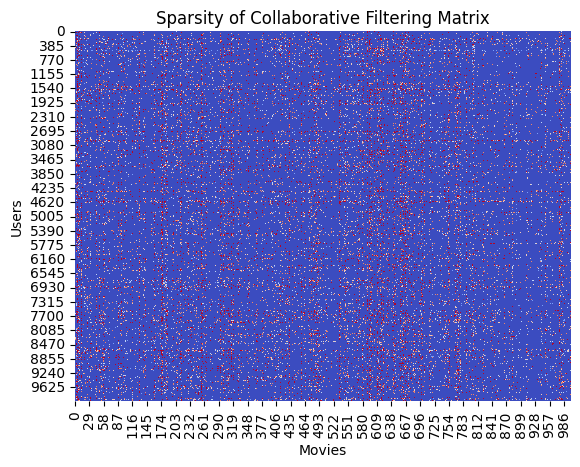

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# assume your csr_matrix is called 'my_matrix'
sns.heatmap(matrix.toarray(), cmap='coolwarm', cbar=False)
plt.title('Sparsity of Collaborative Filtering Matrix')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.show()

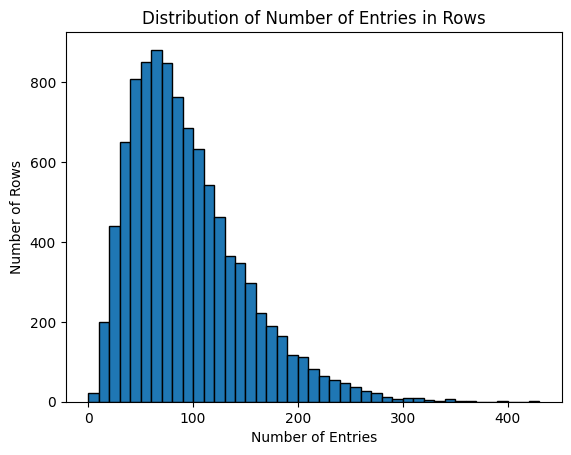

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# assume your matrix is called 'matrix'
row_lengths = np.array(np.sum(matrix != 0, axis=1))
bins = np.arange(0, np.max(row_lengths) + 10, 10)
plt.hist(row_lengths, bins=bins, edgecolor='black')
plt.title('Distribution of Number of Entries in Rows')
plt.xlabel('Number of Entries')
plt.ylabel('Number of Rows')
plt.show()

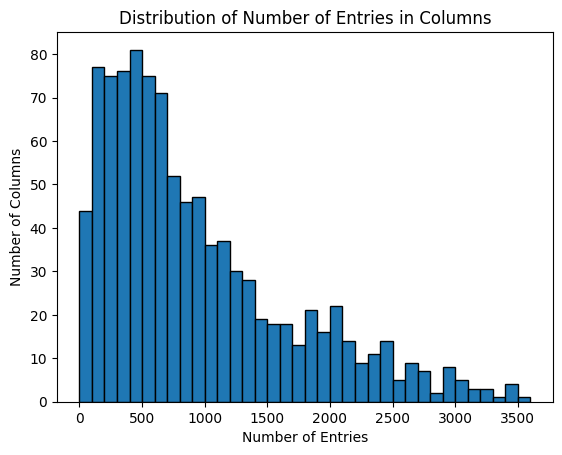

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# assume your matrix is called 'matrix'
col_lengths = np.array(np.sum(matrix != 0, axis=0))

bins = np.arange(0, np.max(col_lengths) + 10, 100)
col_lengths = np.flip(col_lengths, axis=(0, 1))
col_lengths = [np.array(col) for col in col_lengths]
plt.hist(col_lengths, bins=bins, edgecolor='black')
plt.title('Distribution of Number of Entries in Columns')
plt.xlabel('Number of Entries')
plt.ylabel('Number of Columns')
plt.show()